In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
import h5py
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

In [3]:
os.environ["CUDA_VISIBLE_DEVICES"]="1"

In [4]:
PROJECT_PATH = '../'
import sys
sys.path.insert(0, PROJECT_PATH)

In [7]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [5]:
from tensorflow import keras

In [10]:
from tensorflow.keras import layers as kl
from tensorflow.keras import activations

In [11]:
lll = [kl.Conv2D(32, kernel_size=(3, 3)), 
        kl.Activation(activations.relu)]

In [14]:
stem = keras.Sequential()
for ll in lll:
    stem.add(ll)

In [29]:
bodyl = [kl.MaxPooling2D(pool_size=(2, 2)),
kl.Conv2D(64, kernel_size=(3, 3), activation="relu"),
kl.MaxPooling2D(pool_size=(2, 2)),
kl.Flatten(),
kl.Dropout(0.5),
kl.Dense(num_classes, activation="softmax")]

In [31]:
body = keras.Sequential(bodyl)

In [26]:
x = inputs
x = stem(x)
x = body(x)

In [23]:
inputs = keras.Input(shape = (input_shape), name='input')


In [41]:
model = keras.Sequential([inputs, *lll,*bodyl])

In [42]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 activation (Activation)     (None, 26, 26, 32)        0         
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 1600)            

In [43]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [44]:
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15


2022-03-13 14:07:28.658553: I tensorflow/stream_executor/cuda/cuda_dnn.cc:368] Loaded cuDNN version 8201


422/422 [==============================] - 10s 4ms/step - loss: 0.3719 - accuracy: 0.8863 - val_loss: 0.0879 - val_accuracy: 0.9767
Epoch 2/15
422/422 [==============================] - 1s 3ms/step - loss: 0.1143 - accuracy: 0.9644 - val_loss: 0.0578 - val_accuracy: 0.9842
Epoch 3/15
422/422 [==============================] - 1s 3ms/step - loss: 0.0841 - accuracy: 0.9746 - val_loss: 0.0493 - val_accuracy: 0.9858
Epoch 4/15
422/422 [==============================] - 1s 3ms/step - loss: 0.0708 - accuracy: 0.9779 - val_loss: 0.0421 - val_accuracy: 0.9880
Epoch 5/15
422/422 [==============================] - 1s 3ms/step - loss: 0.0633 - accuracy: 0.9800 - val_loss: 0.0408 - val_accuracy: 0.9882
Epoch 6/15
422/422 [==============================] - 1s 3ms/step - loss: 0.0549 - accuracy: 0.9832 - val_loss: 0.0362 - val_accuracy: 0.9905
Epoch 7/15
422/422 [==============================] - 1s 3ms/step - loss: 0.0521 - accuracy: 0.9837 - val_loss: 0.0361 - val_accuracy: 0.9898
Epoch 8/15
422/4

In [45]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.02462637796998024
Test accuracy: 0.9914000034332275


In [12]:
from PIML.box.boxWR import BoxWR

In [13]:
b = BoxWR()

INFO:root:#220 R=1000.00
INFO:root:instrument Res = 5000,  dotSqrt of 2.00
INFO:root:snr2nl-SN: [1.9124585839206668e+02, 63.78201170088925, 47.84903086449207, 38.28924236265376, 19.169665358977138, 9.60987685713883, 6.423280689859393, 4.8299826062196765, 3.874003756035845]
INFO:root:nlList: [195.919  97.829  71.677]
INFO:root:Top #220 eigs [105.32   7.07   5.2    1.44   1.21   0.76   0.57   0.49   0.35   0.28]


sky_H (2204,)
(2204,) 0
Building RBF with gaussan kernel on data shape (2880,)
Building RBF with gaussan kernel on data shape (2880, 220)


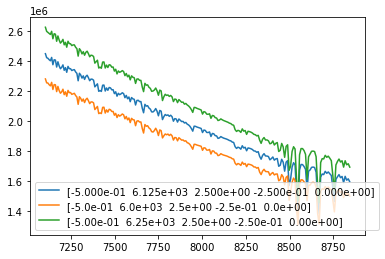

In [15]:
W="RedM"; R="R"; Res=5000;step=10;
b.init(W,R, Res,step, onPCA=1, topk=10)